# Project 1: Powerlifting Data Analysis

## Introduction

---

Powerlifting is a sport that emphasizes maximal effort for maximal strength, featuring three lifts: squat, bench, and deadlift. I'm pretty passionate about the sport, having competed in it myself a few times, so I was curious if I could find answers to a few questions I've been thinking of for quite some time. OpenPowerlifting has provided a public dataset of over 800,000 lifters at countless meets, which provides an astronomical amount of data for the sport, as well as an astronomical amount of answers.

I pulled the dataset from [Kaggle](https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database/data), which is updated as of January 2024. The [original dataset](https://www.openpowerlifting.org/) is more up-to-date, but was not readily availiable for download that I could find. The data provides information on name, age, sex, federation, weight class, equipment, and other statistics that provide a lot of insight into the sport.

There are a few definitions to know before understanding the data:
- Raw: performing the three lifts with no equipment
- Equipped: using equipment such as a bench shirt, knee wraps, etc
- Age Class: Determines the age range you compete in, such as 20-23
- Weight Class: Determines the weight of your competitors within your age range (in kg)

Primary Question: What are the average lifting totals by weight class?

Observations to Explore:
1. Does athlete quantity impact the average lifting total?
2. Does having more athletes in a weight class lead to a higher average?
3. Is there a correlation between the amount of athletes in a federation and the amount of athletes in a weight class?


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Primary Question: What are the average lifting totals by weight class?

---

Data regarding this question will be tied to the dataset labeled `totals_powerlifting`.

The question seems simple at first. Isolate the weight class and total kg columns, and do a little bit of math to find your statistics, right? However, there are other questions tied to this one that could completely skew the data. Does gender play a factor, even though a weight class is shared? Is the athlete an equipped lifter? Is the athlete in a tested federation? Are they the same age? We could even take this further, and attempt to find out which federations test their athletes the most, and which test them the least. The point is, a lot of factors come into play when answering this question, and in order to have an unbiased statistic, we have to set guidelines.

For this question, we will look at the average total by tested, unequipped (raw) male athletes, between the ages of 18 and 30, within the same weight class, who competed in all three events.

In [21]:
totals_powerlifting = pd.read_csv('openpowerlifting.csv',low_memory=False)

In [22]:
totals_powerlifting.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg',
       'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Wilks',
       'McCulloch', 'Glossbrenner', 'IPFPoints', 'Tested', 'Country',
       'Federation', 'Date', 'MeetCountry', 'MeetState', 'MeetName'],
      dtype='object')

We need a few metrics here. Sex, Event, Equipment, Age, WeightClassKg, TotalKg, Place, and Tested.

In [23]:
totals_powerlifting = totals_powerlifting[['Sex', 'Event', 'Equipment', 'Age', 'WeightClassKg', 'TotalKg', 'Tested', 'Federation']]
totals_powerlifting

Sex Event Equipment   Age WeightClassKg  TotalKg Tested Federation
0         F   SBD     Wraps  29.0            60    290.0    NaN    GPC-AUS
1         F   SBD     Wraps  29.0            60    332.5    NaN    GPC-AUS
2         F     B       Raw  40.0            56     32.5    NaN    GPC-AUS
3         F   SBD     Wraps  23.0            60    310.0    NaN    GPC-AUS
4         F   SBD     Wraps  45.0           110    390.0    NaN    GPC-AUS
...      ..   ...       ...   ...           ...      ...    ...        ...
1423349   M   SBD       Raw  60.5            74    452.5    Yes    PZKFiTS
1423350   M   SBD       Raw  55.5            66    375.0    Yes    PZKFiTS
1423351   M   SBD       Raw  62.5           105    440.0    Yes    PZKFiTS
1423352   M   SBD       Raw  63.5            83      NaN    Yes    PZKFiTS
1423353   M   SBD       Raw  70.5            83      NaN    Yes    PZKFiTS

[1423354 rows x 8 columns]

We also need to drop athletes who do not have all of this information available.

In [24]:
totals_powerlifting.dropna(axis=0, inplace=True)
totals_powerlifting

Sex Event Equipment   Age WeightClassKg  TotalKg Tested Federation
8164      M   SBD       Raw  16.0           105    397.5    Yes       BVDK
8165      M   SBD       Raw  20.5            74    365.0    Yes       BVDK
8166      M   SBD       Raw  18.0            74    430.0    Yes       BVDK
8167      M   SBD       Raw  17.5            74    322.5    Yes       BVDK
8169      M   SBD       Raw  25.0          120+    702.5    Yes       BVDK
...      ..   ...       ...   ...           ...      ...    ...        ...
1423347   M   SBD       Raw  65.5            83    537.5    Yes    PZKFiTS
1423348   M   SBD       Raw  67.5            74    505.0    Yes    PZKFiTS
1423349   M   SBD       Raw  60.5            74    452.5    Yes    PZKFiTS
1423350   M   SBD       Raw  55.5            66    375.0    Yes    PZKFiTS
1423351   M   SBD       Raw  62.5           105    440.0    Yes    PZKFiTS

[473605 rows x 8 columns]

Next, we sort the data to match the guidelines we listed above.
- Sex = M
- Event = SBD
- Equipment = Raw
- Age = between 18 and 30
- Tested = Yes

In [25]:
totals_powerlifting = totals_powerlifting[(totals_powerlifting['Sex'] == 'M') & (totals_powerlifting['Event'] == 'SBD') & (totals_powerlifting['Equipment'] == 'Raw') & (totals_powerlifting['Tested'] == 'Yes') & (totals_powerlifting['Age'] >= 18) & (totals_powerlifting['Age'] <= 30)]
totals_powerlifting

Sex Event Equipment   Age WeightClassKg  TotalKg Tested Federation
8165      M   SBD       Raw  20.5            74    365.0    Yes       BVDK
8166      M   SBD       Raw  18.0            74    430.0    Yes       BVDK
8169      M   SBD       Raw  25.0          120+    702.5    Yes       BVDK
8172      M   SBD       Raw  26.5            74    475.0    Yes       BVDK
8180      M   SBD       Raw  25.5            83    435.0    Yes       BVDK
...      ..   ...       ...   ...           ...      ...    ...        ...
1423332   M   SBD       Raw  24.5           120    810.0    Yes    PZKFiTS
1423333   M   SBD       Raw  22.5           120    640.0    Yes    PZKFiTS
1423334   M   SBD       Raw  19.5           120    630.0    Yes    PZKFiTS
1423336   M   SBD       Raw  26.5           120    542.5    Yes    PZKFiTS
1423337   M   SBD       Raw  27.5          120+    770.0    Yes    PZKFiTS

[57057 rows x 8 columns]

Now, we need to find a way to sort the WeightClassKg column by each weight class, and find the mean of those values. First, I'll find all the possible WeightClassKg values, and list them below.

In [26]:
weight_class_categories = totals_powerlifting['WeightClassKg'].unique()
np.sort(weight_class_categories)

array(['100', '100+', '105', '105+', '110', '120', '120+', '125', '125+',
       '140', '140+', '145', '145+', '52', '53', '56', '59', '60', '62',
       '66', '67.5', '69', '74', '75', '77', '82.5', '83', '85', '90',
       '90+', '93', '94'], dtype=object)

I am making the assumption that any class with a plus will not be accurate, due to the large kilogram range it could cover. They could be 200kg, they could be 150kg, it's hard to tell and could skew the data.

In [27]:
totals_powerlifting = totals_powerlifting[~totals_powerlifting['WeightClassKg'].str.contains(r'\+')]
weight_classes = totals_powerlifting['WeightClassKg'].unique()
np.sort(weight_classes)

array(['100', '105', '110', '120', '125', '140', '145', '52', '53', '56',
       '59', '60', '62', '66', '67.5', '69', '74', '75', '77', '82.5',
       '83', '85', '90', '93', '94'], dtype=object)

With this column sorted, we now need to split the weight classes from the column, find the average from those weight classes, and add it to it's own dataframe. 

In [28]:
totals_powerlifting.loc[:, 'WeightClassKg'] = totals_powerlifting['WeightClassKg'].astype(str)
totals_powerlifting.loc[:, 'TotalKg'] = pd.to_numeric(totals_powerlifting['TotalKg'], errors='coerce')

weight_classes = ['52','53','56','59','60','62','66','67.5','69','74','75','77','82.5','83','85','90','93','94','100','105','110','120','125','140','145']
average_totals = []

for weight_class in weight_classes:
    unique_weightClassKg = totals_powerlifting[totals_powerlifting['WeightClassKg'] == weight_class]
    if not unique_weightClassKg.empty:
        mean_total = unique_weightClassKg['TotalKg'].mean()
        count_athletes = unique_weightClassKg['TotalKg'].count()
        average_totals.append({'WeightClass': weight_class, 'AverageTotal': mean_total, 'NumberOfAthletes': count_athletes})
    else:
        raise ValueError(f"No data available for weight class {weight_class}")

average_totals_per_weightClass = pd.DataFrame(average_totals)
average_totals_per_weightClass

WeightClass  AverageTotal  NumberOfAthletes
0           52    432.050845                71
1           53    362.558642               162
2           56    388.271493                67
3           59    421.561860              1290
4           60    403.448030               203
5           62    368.611111                 9
6           66    463.850675              3453
7         67.5    452.033373               673
8           69    465.250000                38
9           74    505.576025              7558
10          75    485.752348              1282
11          77    517.752128                94
12        82.5    521.154853              1669
13          83    541.964461             10887
14          85    533.619565                92
15          90    552.332360              1665
16          93    577.276008             10986
17          94    565.632000               125
18         100    577.163937              1331
19         105    615.945814              7609
20         110    609.490560               875
21         120    647.886839              3761
22         125    633.119910               555
23         140    670.935660               159
24         145    692.034545                11

## Data Visualization

---

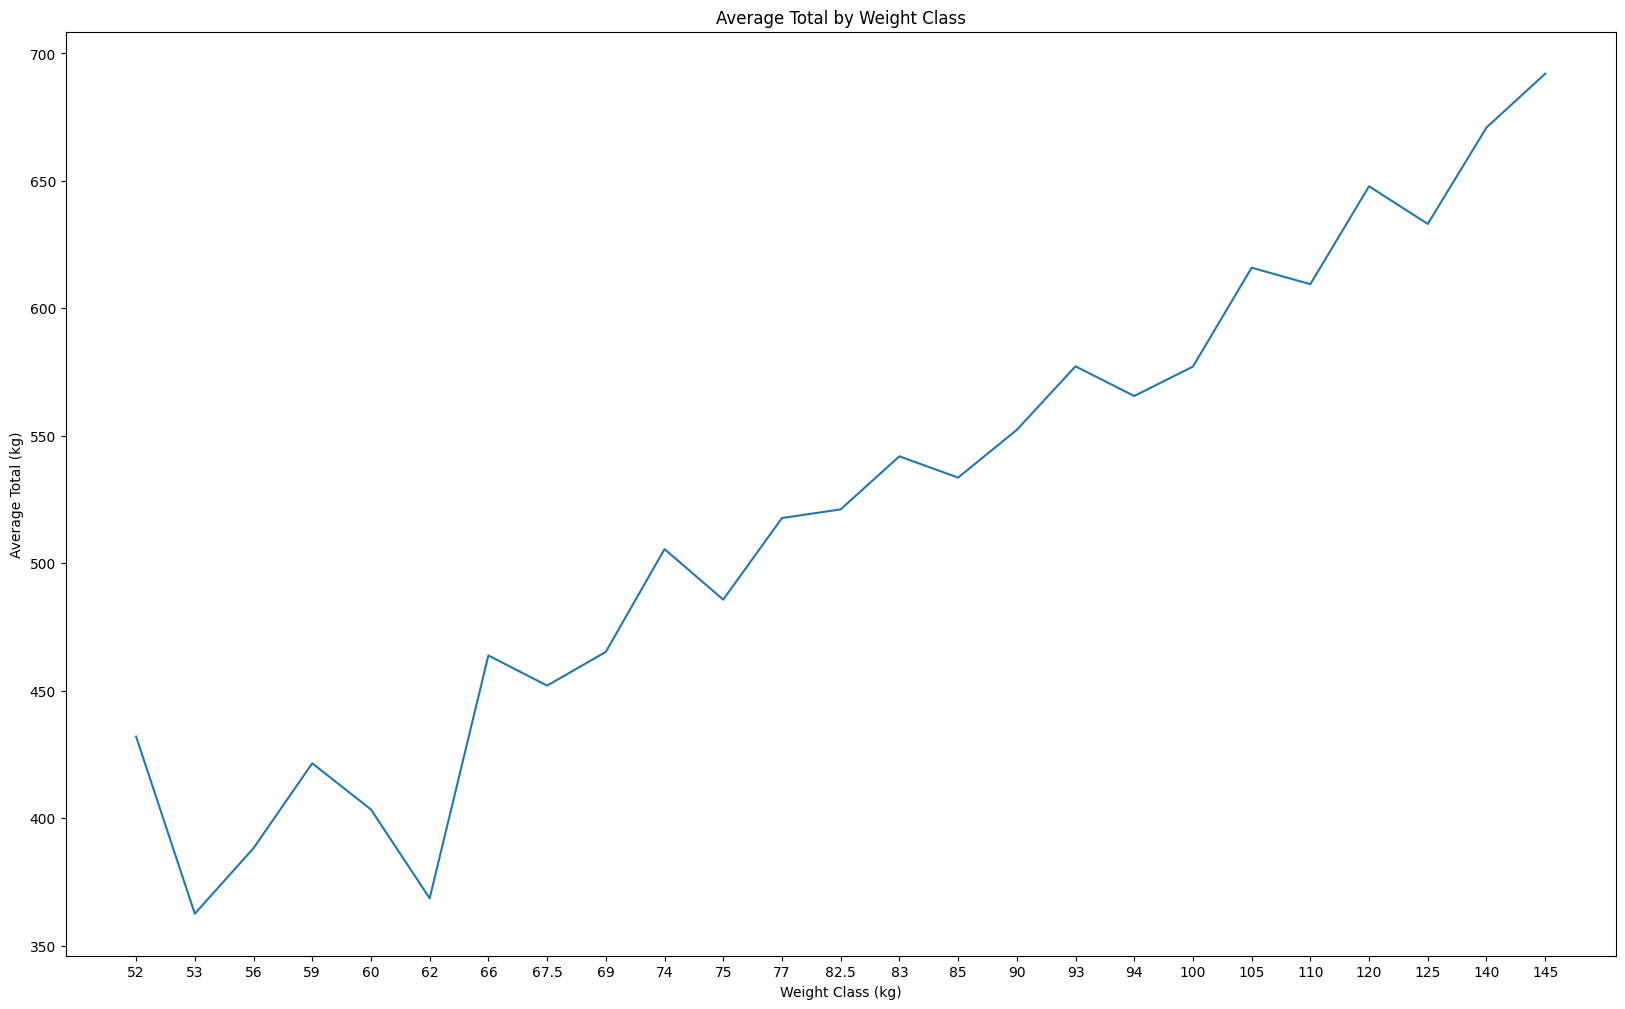

In [29]:
x_axis = average_totals_per_weightClass['WeightClass']
y_axis = average_totals_per_weightClass['AverageTotal']

fig, question1_plot = plt.subplots(figsize=(20, 12))

question1_plot.plot(x_axis, y_axis)
question1_plot.set(title="Average Total by Weight Class", xlabel="Weight Class (kg)", ylabel="Average Total (kg)")

plt.show()

## Observations / Storytelling

---

1. After initially seeing the data, I decided to add another calculated metric, which checks the number of athletes in a weight class. If this value is under 100, I removed the respective weight class from the table. A smaller sample size could lead to incorrect conclusions.

In [30]:
average_totals_per_weightClass_greaterthan_100 = average_totals_per_weightClass[average_totals_per_weightClass['NumberOfAthletes'] >= 100]
average_totals_per_weightClass_greaterthan_100

WeightClass  AverageTotal  NumberOfAthletes
1           53    362.558642               162
3           59    421.561860              1290
4           60    403.448030               203
6           66    463.850675              3453
7         67.5    452.033373               673
9           74    505.576025              7558
10          75    485.752348              1282
12        82.5    521.154853              1669
13          83    541.964461             10887
15          90    552.332360              1665
16          93    577.276008             10986
17          94    565.632000               125
18         100    577.163937              1331
19         105    615.945814              7609
20         110    609.490560               875
21         120    647.886839              3761
22         125    633.119910               555
23         140    670.935660               159

This is the new line graph with the data generated above:

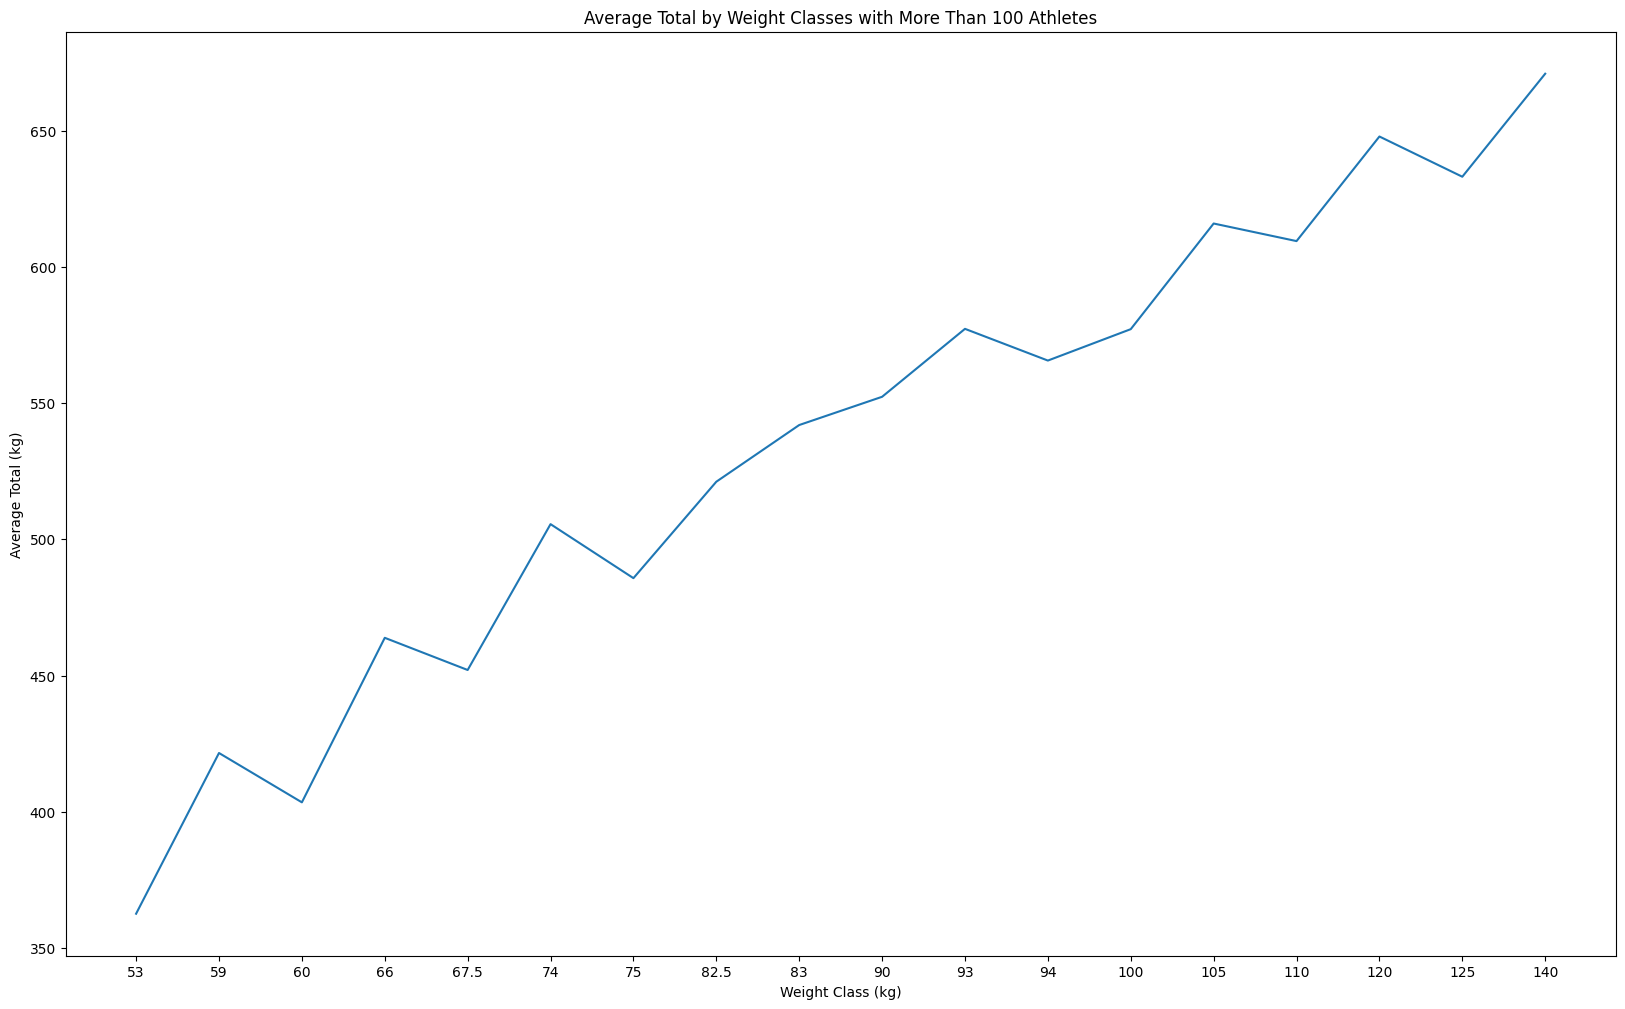

In [31]:
x_axis = average_totals_per_weightClass_greaterthan_100['WeightClass']
y_axis = average_totals_per_weightClass_greaterthan_100['AverageTotal']

fig, question1_plot_extra = plt.subplots(figsize=(20, 12))

question1_plot_extra.plot(x_axis, y_axis)
question1_plot_extra.set(title="Average Total by Weight Classes with More Than 100 Athletes", xlabel="Weight Class (kg)", ylabel="Average Total (kg)")

plt.show()

As you can see in the graph above, compared to the first graph, the wild dips between the 52kg to 66kg weight classes are gone for the most part. The graph now either follows two patterns. One, large increases and decreases near the start and end of the graph; or two, a largely consistent increase near the center of the graph.

2. For the most part, if a weight class has a higher number of athletes, the average total increases, leading to the peaks you'll see in the second graph. For example, the 93kg and 105kg weight classes show much higher increases in comparison to their adjacent counterparts.

3. Another metric I wanted to verify after seeing the data was the correlation between weight class and federation. In powerlifting, there are multiple different federations with different rulesets. For example, in USAPL, the bar used to deadlift is different from the one used in USPA. I wanted to find some trends from this data.

When running the code block below, USAPL is shown as the most popular federation, with 27595 entries. USAPL has these weight classes, pulled from [their rulebook](https://www.usapowerlifting.com/wp-content/uploads/2023/09/USAPL-Rulebook-v2023.1.pdf): 52, 56, 60, 67.5, 75, 82.5, 90, 100, 110, 125, 140.


In [32]:
totals_powerlifting['Federation'].value_counts()

Federation
USAPL      27595
PA          3824
USPA        1921
NZPF        1684
SVNL        1278
           ...  
HERC           5
WPC-UKR        3
BAWLA          2
CBLB           2
CPO            2
Name: count, Length: 84, dtype: int64

In [33]:
average_totals_per_weightClass

WeightClass  AverageTotal  NumberOfAthletes
0           52    432.050845                71
1           53    362.558642               162
2           56    388.271493                67
3           59    421.561860              1290
4           60    403.448030               203
5           62    368.611111                 9
6           66    463.850675              3453
7         67.5    452.033373               673
8           69    465.250000                38
9           74    505.576025              7558
10          75    485.752348              1282
11          77    517.752128                94
12        82.5    521.154853              1669
13          83    541.964461             10887
14          85    533.619565                92
15          90    552.332360              1665
16          93    577.276008             10986
17          94    565.632000               125
18         100    577.163937              1331
19         105    615.945814              7609
20         110    609.490560               875
21         120    647.886839              3761
22         125    633.119910               555
23         140    670.935660               159
24         145    692.034545                11

The weight classes in the USAPL, although it's the most popular federation, seem to have the lowest number of athletes in the filtered dataset. Let's investigate Powerlifting America (PA) next.

PA uses the International Powerlifting Federation (IPF) ruleset, which provides these weight classes from [their rulebook](https://www.powerlifting.sport/fileadmin/ipf/data/rules/technical-rules/english/IPF_Technical_Rules_Book_2024_24_Jan.pdf): 59, 66, 74, 83, 93, 105, 120.

If we look at the table above, we can see that the majority of athletes are in these weight classes.

Continuing down the list. USPA follows the same categories as USAPL. NZPF follows the same categories as the IPF. In general, it seems like most federations either follow the IPF weight classes or the USAPL ones. 

So, is there a correlation between the amount of athletes in a federation and the amount of athletes in a weight class? Short answer? It depends. The question itself is somewhat skewed. The ruleset determines the weight class, federations follow different rulesets, so depending on which federations follow which rulesets, the answer changes. We could technically find an answer, by going through every single listed federation out of the 84, finding out which ruleset they follow, and linking them to weight class, but an insane amount of effort for a possibly ambiguous answer.

### Reflection

---

Most of the questions were able to be answered, except for question three. The questions I chose were somewhat open-ended, but some, like the primary question and question two, were directly answered by the data provided. In the future, more thought-provoking questions such as number one and number three are better to use, just because of how deep you can go into the data, understand what's happening, and come to a reasonable conclusion from it. It's much more enjoyable to do that versus the latter.

## Impact

---

The only real impact I can think of is a misconception an athlete can have because of this data. Someone who does or does not participate in the sport, could see the average numbers recorded here, and overestimate themselves, leading to overexhertion and possibly injury. From personal experience, most of the athletes I've met who powerlift have been training in the sport for years, and train multiple times a week to get in condition to lift weight even close to this. Without proper training, diet, and rest for a long period of time, the average person could probably not attain a lift close to these numbers.

I would say that perspective-wise, data could be missing that skews these numbers. There could've been an athlete that didn't have their numbers recorded, for example. This dataset started with almost 800,000 values, and went down to almost 80,000 due to the constraints that were put on it. The numbers may be completely different if we included the entire dataset, but that's hard to tell without doing analysis. 

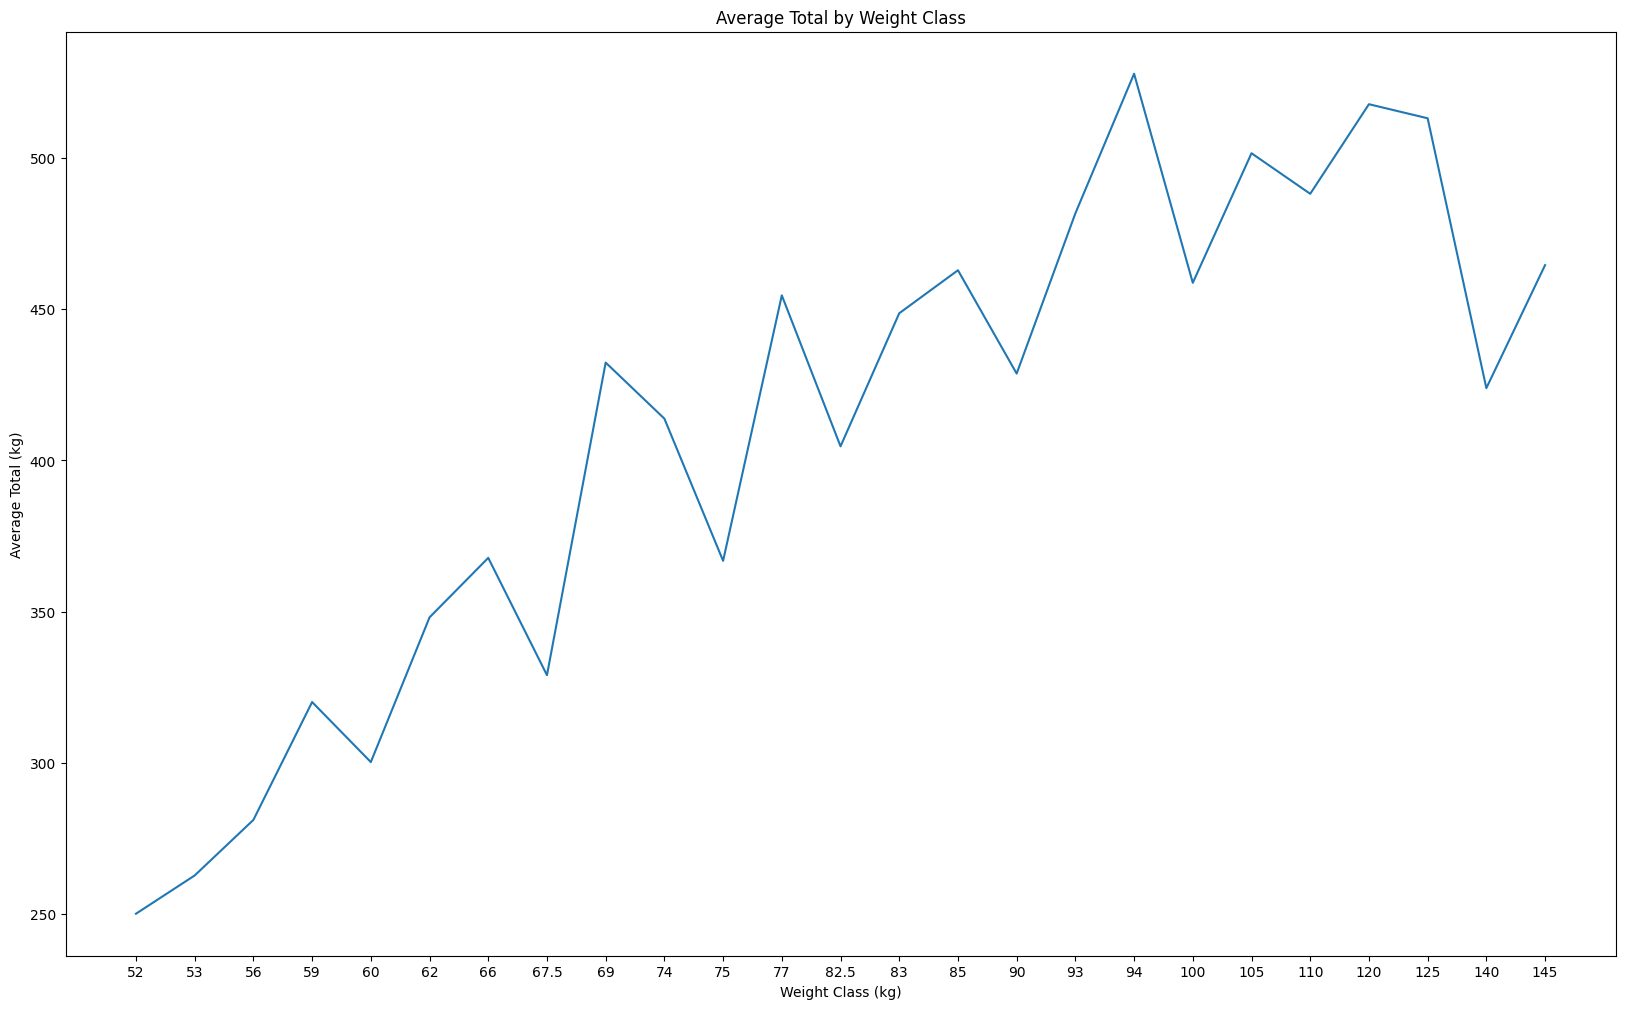

In [34]:
full_dataset = pd.read_csv('openpowerlifting.csv',low_memory=False)
full_dataset = full_dataset[['Sex', 'Event', 'Equipment', 'Age', 'WeightClassKg', 'TotalKg', 'Tested', 'Federation']]
full_dataset.dropna(axis=0, inplace=True)

weight_class_categories_fulldataset = full_dataset['WeightClassKg'].unique()
np.sort(weight_class_categories_fulldataset)

full_dataset = full_dataset[~full_dataset['WeightClassKg'].str.contains(r'\+')]
weight_classes_fulldataset = full_dataset['WeightClassKg'].unique()
np.sort(weight_classes_fulldataset)

full_dataset.loc[:, 'WeightClassKg'] = full_dataset['WeightClassKg'].astype(str)
full_dataset.loc[:, 'TotalKg'] = pd.to_numeric(full_dataset['TotalKg'], errors='coerce')

weight_classes_fulldataset = ['52','53','56','59','60','62','66','67.5','69','74','75','77','82.5','83','85','90','93','94','100','105','110','120','125','140','145']
average_totals_fulldataset = []

for weight_class_fulldataset in weight_classes_fulldataset:
    unique_weightClassKg_fulldataset = full_dataset[full_dataset['WeightClassKg'] == weight_class_fulldataset]
    if not unique_weightClassKg_fulldataset.empty:
        mean_total_fulldataset = unique_weightClassKg_fulldataset['TotalKg'].mean()
        count_athletes_fulldataset = unique_weightClassKg_fulldataset['TotalKg'].count()
        average_totals_fulldataset.append({'WeightClass': weight_class_fulldataset, 'AverageTotal': mean_total_fulldataset, 'NumberOfAthletes': count_athletes_fulldataset})
    else:
        raise ValueError(f"No data available for weight class {weight_class_fulldataset}")

average_totals_per_weightClass_fulldataset = pd.DataFrame(average_totals_fulldataset)
average_totals_per_weightClass_fulldataset

x_axis_fulldataset = average_totals_per_weightClass_fulldataset['WeightClass']
y_axis_fulldataset = average_totals_per_weightClass_fulldataset['AverageTotal']

fig, question1_plot_fulldataset = plt.subplots(figsize=(20, 12))

question1_plot_fulldataset.plot(x_axis_fulldataset, y_axis_fulldataset)
question1_plot_fulldataset.set(title="Average Total by Weight Class", xlabel="Weight Class (kg)", ylabel="Average Total (kg)")

plt.show()

So, the numbers are completely different. Goes to show that narrowing down the data to very specific constraints gives a very specific output, instead of a generalized one.

## References

---

[open powerlifting](https://www.openpowerlifting.org/), [kaggle](https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database/data), [ipf rulebook](https://www.powerlifting.sport/fileadmin/ipf/data/rules/technical-rules/english/IPF_Technical_Rules_Book_2024_24_Jan.pdf), [usapl rulebook](https://www.usapowerlifting.com/wp-content/uploads/2023/09/USAPL-Rulebook-v2023.1.pdf)

I used Copilot and ChatGPT to help me write some of the code, specifically this block from what I remember:

```
for weight_class in weight_classes:
    unique_weightClassKg = totals_powerlifting[totals_powerlifting['WeightClassKg'] == weight_class]
    if not unique_weightClassKg.empty:
        mean_total = unique_weightClassKg['TotalKg'].mean()
        count_athletes = unique_weightClassKg['TotalKg'].count()
        average_totals.append({'WeightClass': weight_class, 'AverageTotal': mean_total, 'NumberOfAthletes': count_athletes})
    else:
        raise ValueError(f"No data available for weight class {weight_class}")
```

also used it for error resolution and syntax help, not super familiar with a lot of the libraries just yet